# Goal:Hotel Demand Predition

# The basic Strategy followed is described below

# Proceedure:
<!-- #### <a id='# Data_Expolaration'> Data Expolaration</a> -->

#### [Data Expolaration](#Data_Expolaration)

    0.1 Overall Data Expolaration
    0.2 Data Seperation Based on Types

#### 1. Data Cleaning 
    1.1 Outlier Detection and Capping
    1.2 Missing Value Treatment
    1.3 Correlation Analysis

#### 2. Feature Engineering
    2.1 GeneratingNew Feature
    2.2 Zero Variance Check
    2.3 Univariate Analysis
    2.4 Bi Variate Analysi
    2.5 Feature Selection

#### 3. Model Building
    3.1 Random Forest Classifier
    3.2 DecisionTree Classifier
    3.3 Logistic Regression
    3.4 GradientBoosing Classifier (Bagging)
    3.5 XG Boost Classifier
    3.6 Stacking Classifier

#### 4. Evaluation
    4.1 Metric Evaluation (Accuracy, Precision, Recall, F1-score, ROC Curve) 
    4.2 Model Comparison
  

*******************************************************************

# Importing necessary Libraries

In [87]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

# Loading Dataset

In [88]:
df = pd.read_csv('hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_month_year,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,July 2015,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-2015
1,Resort Hotel,0,737,July 2015,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-2015
2,Resort Hotel,0,7,July 2015,2015,July,27,1,0,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02-07-2015
3,Resort Hotel,0,13,July 2015,2015,July,27,1,0,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,02-07-2015
4,Resort Hotel,0,14,July 2015,2015,July,27,1,0,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03-07-2015


In [89]:
# Inspecting datatypes of coloumns

In [90]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_month_year                 object
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                      

In [118]:
df.describe(include='all')

,hotel,is_canceled,lead_time,arrival_month_year,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,target
count,119390,119390.000000,119390.000000,119390,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390.000000,...,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390,119390,119390.000000
unique,2,NaN,NaN,26,NaN,12,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4,NaN,NaN,NaN,3,926,NaN
top,City Hotel,NaN,NaN,May 2017,NaN,August,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Transient,NaN,NaN,NaN,Check-Out,21-10-2015,NaN
freq,79330,NaN,NaN,6313,NaN,13877,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,89613,NaN,NaN,NaN,75166,1461,NaN
mean,NaN,0.370416,104.011416,NaN,2016.156554,NaN,27.165173,15.798241,0.927599,2.500302,...,74.828319,10.775157,2.321149,NaN,101.831122,0.062518,0.571363,NaN,NaN,0.370416
std,NaN,0.482918,106.863097,NaN,0.707476,NaN,13.605138,8.780829,0.998613,1.908286,...,107.141953,53.943884,17.594721,NaN,50.535790,0.245291,0.792798,NaN,NaN,0.482918
min,NaN,0.000000,0.000000,NaN,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN,0.000000
25%,NaN,0.000000,18.000000,NaN,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,...,7.000000,0.000000,0.000000,NaN,69.290000,0.000000,0.000000,NaN,NaN,0.000000
50%,NaN,0.000000,69.000000,NaN,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,...,9.000000,0.000000,0.000000,NaN,94.575000,0.000000,0.000000,NaN,NaN,0.000000
75%,NaN,1.000000,160.000000,NaN,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,...,152.000000,0.000000,0.000000,NaN,126.000000,0.000000,1.000000,NaN,NaN,1.000000


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_month_year              119390 non-null  object 
 4   arrival_date_year               119390 non-null  int64  
 5   arrival_date_month              119390 non-null  object 
 6   arrival_date_week_number        119390 non-null  int64  
 7   arrival_date_day_of_month       119390 non-null  int64  
 8   stays_in_weekend_nights         119390 non-null  int64  
 9   stays_in_week_nights            119390 non-null  int64  
 10  adults                          119390 non-null  int64  
 11  children                        119386 non-null  float64
 12  babies          

In [93]:
df.dtypes.value_counts()

int64      16
object     13
float64     4
dtype: int64

In [94]:
# We find 16 integer  coloumns,13 object datatype coloumns,4 float coloumns

In [95]:
# dataframe shape
df.shape

(119390, 33)

In [96]:
# Some inspection about the data distribution

In [97]:
df['is_canceled'].value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

In [98]:
df['hotel'].value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

In [99]:
# Here in is_cancelled coloumn 1 is cancelled 0 is not cancelled

In [100]:
df['is_canceled'].value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

In [101]:
# Create target coloumn from is cancelled coloumn

In [102]:
df['target']=np.where(df['is_canceled'].isin([1]),1,0) 

In [103]:
df['target'].value_counts()

0    75166
1    44224
Name: target, dtype: int64

In [104]:
df['target'].mean()

0.37041628277075134

In [105]:
# Lets visualise this target coloumn

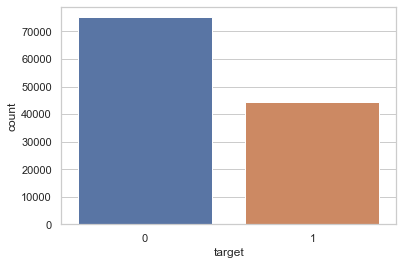

In [106]:
sns.countplot(x='target',data=df)
plt.show()

In [107]:
# Missing Value Analysis

In [108]:
# check for missing values
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_month_year                     0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent           

In [109]:
df.isnull().sum().sort_values(ascending=False)

company                           112593
agent                              16340
country                              488
children                               4
previous_cancellations                 0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
reservation_status_date                0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults          

In [110]:
# We find company,agent,country and children has missing values

In [111]:
# Delving into nature of the data coloumns we find out that 
# For company if no data is given then it is private booking else it is booked by his company-So lets substitute the null values by 0
# If agent is missing then most likely made by the person himself without help from any travel agent
# For country if value missing then it is most liekly unknown
# If children data is missing then most likely the person deosn't have children


In [112]:
# Lets make a dictionary of such replacements to be done
nadict = {"children": 0,"country": "Unknown", "agent": 0, "company": 0}

In [113]:
# fill null in dataframe
df = df.fillna(nadict)

# "meal" contains values "Undefined", which is same as SC category.So we replace undefined by sc
df["meal"].replace("Undefined", "SC", inplace=True)

In [114]:
df.isnull().any().sum()

0

#Some points to note
agent-The id of agent that did reservation is of no importanceto us
comany-The id of company that did reservation is of no importanceto us
reservation_status_date - We have other features (like: arrival_date_week_number, arrival_date_day_of_month etc) that gives us the same information


In [115]:
# Lets do some EDA

In [121]:
df['meal'].value_counts()

BB    92310
HB    14463
SC    11819
FB      798
Name: meal, dtype: int64

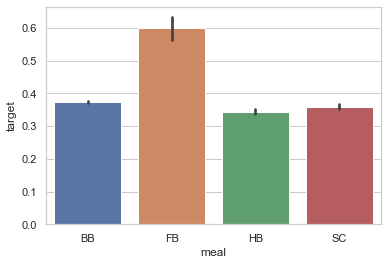

In [116]:
from numpy import mean
ax = sns.barplot(x="meal", y="target", data=df, estimator=mean)

In [ ]:
# From dataset description we find that
# BB – Bed &Breakfast;
# HB – Half board(breakfastandone
# other meal – usually dinner);
# FB – Full board(breakfast,lunchand
# dinner)

In [123]:
# So FB has highest cancellation rates

In [124]:
# Lets find which coutries have highest cacellation rates

In [130]:
df.groupby('country')['target'].mean()

country
ABW    0.000000
AGO    0.566298
AIA    0.000000
ALB    0.166667
AND    0.714286
         ...   
VGB    1.000000
VNM    0.250000
ZAF    0.387500
ZMB    0.500000
ZWE    0.500000
Name: target, Length: 178, dtype: float64

In [139]:
# Highest cancellation countries
df.groupby('country')['target'].mean().sort_values(ascending=False).head(15)

country
FJI    1.000000
GGY    1.000000
GLP    1.000000
UMI    1.000000
HND    1.000000
IMN    1.000000
JEY    1.000000
NIC    1.000000
KHM    1.000000
VGB    1.000000
BEN    1.000000
MYT    1.000000
MAC    0.937500
HKG    0.896552
TJK    0.888889
Name: target, dtype: float64

In [146]:
sns.set(rc={'figure.figsize':(10,5)})

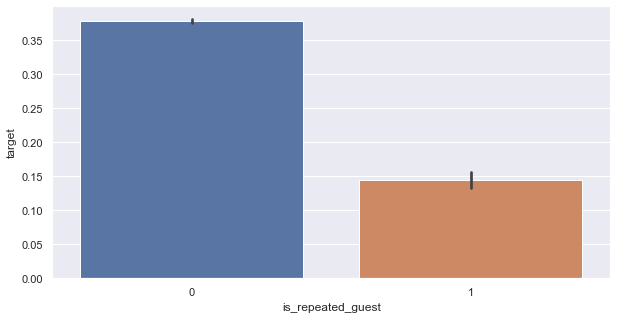

In [147]:
# Repeated Guest
ax = sns.barplot(x="is_repeated_guest", y="target", data=df, estimator=mean)

In [148]:
# We observe that repeated guest have much lower cancellation rates

In [150]:
# Market Segment Bookings

In [151]:
df['market_segment'].value_counts()

Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: market_segment, dtype: int64

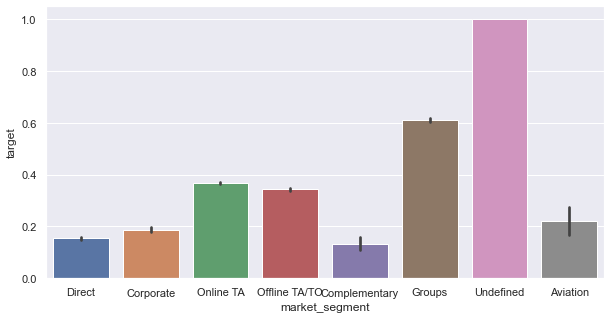

In [149]:
ax = sns.barplot(x="market_segment", y="target", data=df, estimator=mean)

In [156]:
df.groupby('market_segment')['target'].mean()

market_segment
Aviation         0.219409
Complementary    0.130552
Corporate        0.187347
Direct           0.153419
Groups           0.610620
Offline TA/TO    0.343160
Online TA        0.367211
Undefined        1.000000
Name: target, dtype: float64

In [152]:
# Ignoring undefined category snce it has only 2 datapoints we find that groups market segment has highest cancellation rates